# Dataset Directories Initialization

In [2]:
import os.path
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree
import sklearn.ensemble
import sklearn.datasets
import sklearn.metrics
import pandas as pd
from sklearn.model_selection import train_test_split
import glob

import warnings
warnings.filterwarnings("ignore")  # Ignore sklearn deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)       # Ignore sklearn deprecation warnings

In [3]:
current_directory = os.path.dirname(os.getcwd())
project_directory = os.path.split(current_directory)[0]
dataset_directory = os.path.join(project_directory, 'datasets')

occupancy_dataset_directory = os.path.join(dataset_directory, '1_occupancy')
healthy_older_people_dataset_directory = os.path.join(dataset_directory, '2_healthy_older_people')
bitcoin_heist_ransonware_address_dataset_directory = os.path.join(dataset_directory, '3_bitcoin_heist_ransonware_address')
bank_additional_dataset_directory = os.path.join(dataset_directory, '4_bank_additional')

print(os.listdir(dataset_directory))
print(occupancy_dataset_directory
      , healthy_older_people_dataset_directory
      , bitcoin_heist_ransonware_address_dataset_directory
      , bank_additional_dataset_directory)

['1_occupancy', '2_healthy_older_people', '3_bitcoin_heist_ransonware_address', '4_bank_additional', 'urls.txt']
D:\pravesh\Concordia\2020-Fall\COMP-6321_ML\project\COMP-6321-ML\datasets\1_occupancy D:\pravesh\Concordia\2020-Fall\COMP-6321_ML\project\COMP-6321-ML\datasets\2_healthy_older_people D:\pravesh\Concordia\2020-Fall\COMP-6321_ML\project\COMP-6321-ML\datasets\3_bitcoin_heist_ransonware_address D:\pravesh\Concordia\2020-Fall\COMP-6321_ML\project\COMP-6321-ML\datasets\4_bank_additional


<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# 1. Occupancy Dataset

## 1.1. Data Loading

In [4]:
training_dataset_url = os.path.join(occupancy_dataset_directory, 'occupancy_data', 'datatraining.txt')
test_dataset_url = os.path.join(occupancy_dataset_directory, 'occupancy_data', 'datatest.txt')

training_data_file = np.loadtxt(training_dataset_url, delimiter=',', skiprows=1, usecols = (2,3,4,5,6,7))
X_train=training_data_file[:, 0:5]
y_train=training_data_file[:, 5].astype(np.int32)
print(X_train.shape, y_train.shape)

test_data_file = np.loadtxt(test_dataset_url, delimiter=',', skiprows=1, usecols = (2,3,4,5,6,7))
X_test=test_data_file[:, 0:5]
y_test=test_data_file[:, 5].astype(np.int32)
print(X_test.shape, y_test.shape)

(8143, 5) (8143,)
(2665, 5) (2665,)


## 1.2. Data Analysis & Cleaning

### 1.2.1. Statistics

In [5]:
# No of Attributed

columns = np.array(["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])
print('Input Columns Count:', X_train.shape[1])
print('Input Columns:', columns)
print('Output Column:', "Occupancy")
print()
print('Training Data')
print('Number of Rows:', X_train.shape[0])
print()
print('Test Data')
print('Number of Rows:', X_test.shape[0])

Input Columns Count: 5
Input Columns: ['Temperature' 'Humidity' 'Light' 'CO2' 'HumidityRatio']
Output Column: Occupancy

Training Data
Number of Rows: 8143

Test Data
Number of Rows: 2665


In [6]:
stats = np.vstack((X_train.std(axis=0), X_train.mean(axis=0), X_train.min(axis=0), X_train.max(axis=0)))
    
for i in range(5):
    print(columns[i], ': mean=', stats[0][i], ', std=', stats[1][i]
          , 'max=', stats[3][i], 'min=', stats[2][i]
          , ', ptp=', np.ptp(X_train[:, i]))


Temperature : mean= 1.0168539980465523 , std= 20.61908364034621 max= 23.18 min= 19.0 , ptp= 4.18
Humidity : mean= 5.530871359349676 , std= 25.731507286422527 max= 39.1175 min= 16.745 , ptp= 22.3725
Light : mean= 194.743845951489 , std= 119.51937451389756 max= 1546.33333333333 min= 0.0 , ptp= 1546.33333333333
CO2 : mean= 314.3015762223732 , std= 606.5462431945632 max= 2028.5 min= 412.75 , ptp= 1615.75
HumidityRatio : mean= 0.0008522789623220694 , std= 0.0038625066783203907 max= 0.00647601323671025 min= 0.00267412691390407 , ptp= 0.0038018863228061798


### 1.2.2. Feature Value Densities

Text(0.5, 1.0, 'HumidityRatio[4]')

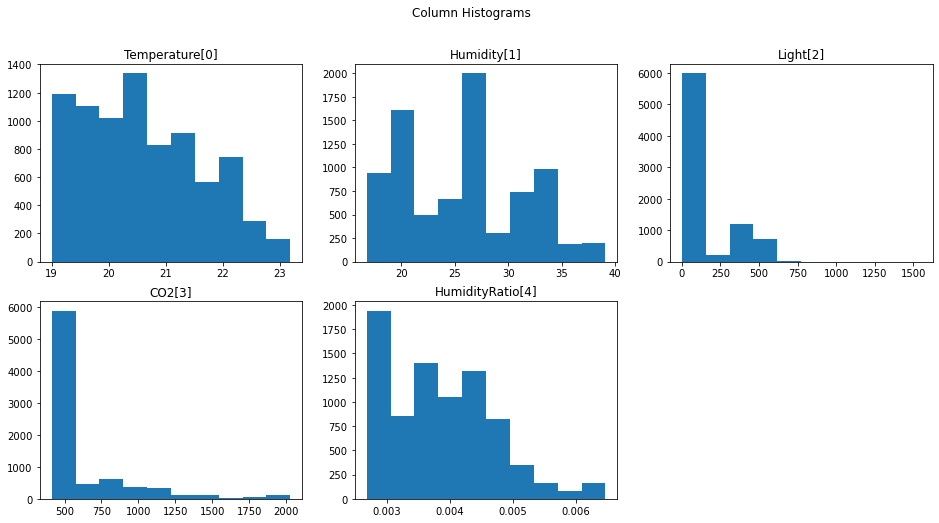

In [159]:

fig = plt.figure(figsize=(16, 8)) 
fig.suptitle('Column Histograms')

ax = fig.add_subplot(2, 3, 1) 
ax.hist(X_train[:, 0], bins=10)
ax.set_title('Temperature[0]')

ax = fig.add_subplot(2, 3, 2) 
ax.hist(X_train[:, 1], bins=10)
ax.set_title('Humidity[1]')

ax = fig.add_subplot(2, 3, 3) 
ax.hist(X_train[:, 2], bins=10)
ax.set_title('Light[2]')

ax = fig.add_subplot(2, 3, 4) 
ax.hist(X_train[:, 3], bins=10)
ax.set_title('CO2[3]')

ax = fig.add_subplot(2, 3, 5) 
ax.hist(X_train[:, 4], bins=10)
ax.set_title('HumidityRatio[4]')

### 1.2.3. Checking Outliners

Text(0.5, 1.0, 'HumidityRatio[4]')

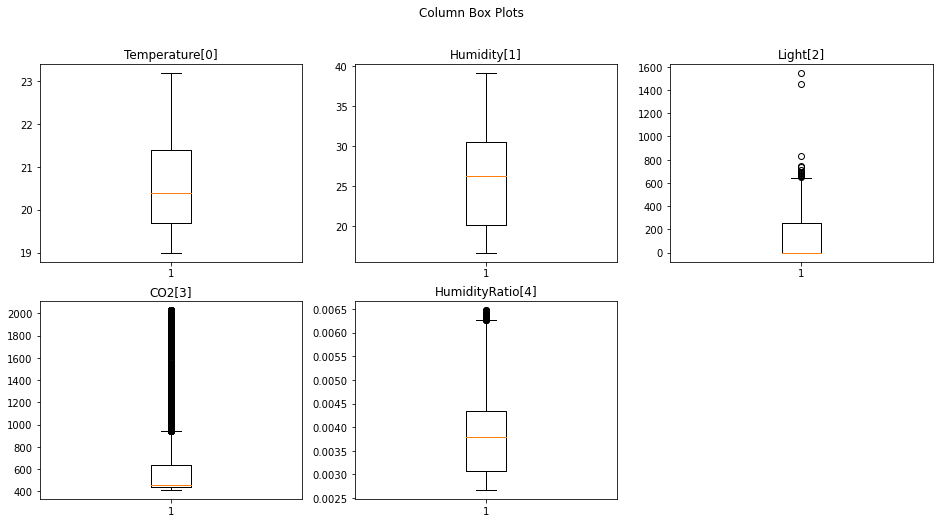

In [160]:
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Column Box Plots')

ax = fig.add_subplot(2, 3, 1) 
ax.boxplot(X_train[:, 0])
ax.set_title('Temperature[0]')

ax = fig.add_subplot(2, 3, 2) 
ax.boxplot(X_train[:, 1])
ax.set_title('Humidity[1]')

ax = fig.add_subplot(2, 3, 3) 
ax.boxplot(X_train[:, 2])
ax.set_title('Light[2]')

ax = fig.add_subplot(2, 3, 4) 
ax.boxplot(X_train[:, 3])
ax.set_title('CO2[3]')

ax = fig.add_subplot(2, 3, 5) 
ax.boxplot(X_train[:, 4])
ax.set_title('HumidityRatio[4]')

## 1.3. Model Evaluation

### 1.3.1. Logistic Regression

 #### 1.3.1.1. Without Feature Scaling

In [102]:
lr_model_1 = sklearn.linear_model.LogisticRegression(random_state=0)
lr_model_1.fit(X_train, y_train);
z_train_1 = lr_model_1.predict(X_train)
z_test_1 = lr_model_1.predict(X_test)
print(sklearn.metrics.accuracy_score(y_train, z_train_1)*100)
print(sklearn.metrics.accuracy_score(y_test, z_test_1)*100)

98.60002456097261
97.6360225140713


#### 1.3.1.2. With Standardization

In [103]:
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train_2 = scaler.transform(X_train)
X_test_2 = scaler.transform(X_test)

lr_model_2 = sklearn.linear_model.LogisticRegression(random_state=0)
lr_model_2.fit(X_train_2, y_train);
z_train_2 = lr_model_2.predict(X_train_2)
z_test_2 = lr_model_2.predict(X_test_2)
print(sklearn.metrics.accuracy_score(y_train, z_train_2)*100)
print(sklearn.metrics.accuracy_score(y_test, z_test_2)*100)

98.60002456097261
97.71106941838649


#### 1.3.1.3. With Normalization

In [104]:
scaler = sklearn.preprocessing.MaxAbsScaler().fit(X_train)
X_train_2 = scaler.transform(X_train)
X_test_2 = scaler.transform(X_test)

lr_model_2 = sklearn.linear_model.LogisticRegression(random_state=0)
lr_model_2.fit(X_train_2, y_train);
z_train_2 = lr_model_2.predict(X_train_2)
z_test_2 = lr_model_2.predict(X_test_2)
print(sklearn.metrics.accuracy_score(y_train, z_train_2)*100)
print(sklearn.metrics.accuracy_score(y_test, z_test_2)*100)

98.82107331450325
97.82363977485929


In [7]:
lr_model = sklearn.linear_model.LogisticRegression(n_jobs=-1)
max_iter_values = 2**np.linspace(1, 8, 8, dtype=np.int32)
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
fit_intercept_values = [True, False]

param_grid = { "fit_intercept":[True, False], "solver": solver_values, 
             "max_iter": max_iter_values}

gridcv = sklearn.model_selection.GridSearchCV(lr_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
lr_best_estimator = gridcv.best_estimator_
lr_best_estimator_score = gridcv.best_score_

In [8]:
print('Best Estimator: ', lr_best_estimator, '=>')
print('Params: ', lr_best_estimator)
print('Training Accuracy Score: ', lr_best_estimator_score*100)
y_pred = lr_best_estimator.predict(X_test)
print('Test Accuracy Score: ', sklearn.metrics.accuracy_score(y_test, y_pred)*100)
print('ROC AUC score: ', sklearn.metrics.roc_auc_score(y_test, y_pred)*100)

Best Estimator:  LogisticRegression(max_iter=16, n_jobs=-1, solver='liblinear') =>
Params:  LogisticRegression(max_iter=16, n_jobs=-1, solver='liblinear')
Training Accuracy Score:  98.6247422711511
Test Accuracy Score:  97.82363977485929
ROC AUC score:  98.22134351323167


### 1.3.2. K-Means

In [13]:
#k-Nearest neighbours classification
%%time
knn_model = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)
n_neighbor_values =  2**np.linspace(1, 8, 8, dtype=np.int32)
param_grid = {"n_neighbors": n_neighbor_values}

gridcv = sklearn.model_selection.GridSearchCV(knn_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)
knn_best_estimator = gridcv.best_estimator_
knn_best_estimator_score = gridcv.best_score_
print(time)

UsageError: Line magic function `%%time` not found.


In [172]:
print('Best Estimator: ', knn_best_estimator, '=>')
print('Params: ', knn_best_estimator)
print('Training Accuracy Score: ', knn_best_estimator_score*100)
y_pred = knn_best_estimator.predict(X_test)
print('Test Accuracy Score: ', sklearn.metrics.accuracy_score(y_test, y_pred)*100)
print('ROC AUC score: ', sklearn.metrics.roc_auc_score(y_test, y_pred)*100)

Best Estimator:  KNeighborsClassifier(n_jobs=-1, n_neighbors=32) =>
Params:  {'n_neighbors': 32}
Training Accuracy Score:  97.20034449316218
Test Accuracy Score:  97.82363977485929
ROC AUC score:  98.24325046973861


# 2. Bank Marketting Dataset

## 2.1. Data Loading

In [173]:
training_dataset_url = os.path.join(bank_additional_dataset_directory, 'bank-additional', 'bank-additional', 'bank-additional-full.csv')
test_dataset_url = os.path.join(bank_additional_dataset_directory, 'bank-additional', 'bank-additional', 'bank-additional.csv')
print(training_dataset_url, test_dataset_url)


# Loading code
job_mapping = {'admin.':1, 'blue-collar':2, 'entrepreneur':3
               , 'housemaid':4, 'management':5, 'retired':6
               , 'self-employed':7, 'services':8, 'student':9
               , 'technician':10, 'unemployed':11, 'unknown':0}
boolean_mapping ={'no': 0, 'yes': 1}
marital_mapping ={'divorced':1, 'married':2, 'single':3}
education_mapping={'basic.4y':1, 'basic.6y':2, 'basic.9y':3
                   , 'high.school':4, 'illiterate':5, 'professional.course':6
                   , 'university.degree':7}
contact_mapping={'cellular':1, 'telephone':2}
month_mapping={'may':5, 'jun':6, 'nov':11
               , 'sep':9, 'jul':7, 'aug':8
               , 'mar':3, 'oct':10, 'apr':4
               , 'dec':12}
day_mapping={'fri':5, 'wed':3, 'mon':1, 'thu':4, 'tue':2}
poutcome_mapping={'nonexistent':1, 'failure':2, 'success':3}
R=pd.read_csv(training_dataset_url, delimiter=';').replace(boolean_mapping).replace(job_mapping).replace(marital_mapping).replace(education_mapping).replace(contact_mapping).replace(month_mapping).replace(day_mapping).replace(poutcome_mapping).values
X_train=R[:, [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19]]
y_train=R[:, 20].astype(np.int32)
T=pd.read_csv(test_dataset_url, delimiter=';').replace(boolean_mapping).replace(job_mapping).replace(marital_mapping).replace(education_mapping).replace(contact_mapping).replace(month_mapping).replace(day_mapping).replace(poutcome_mapping).values
X_test=T[:, [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19]]
y_test=T[:, 20].astype(np.int32)

D:\pravesh\Concordia\2020-Fall\COMP-6321_ML\project\COMP-6321-ML\datasets\4_bank_additional\bank-additional\bank-additional\bank-additional-full.csv D:\pravesh\Concordia\2020-Fall\COMP-6321_ML\project\COMP-6321-ML\datasets\4_bank_additional\bank-additional\bank-additional\bank-additional.csv


## 2.2. Data Analysis

### 2.2.1. Counts

In [174]:
# No of Attributed

# columns = np.array(["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])
print('Input Columns Count:', X_train.shape[1])
# print('Input Columns:', columns)
# print('Output Column:', "Occupancy")
print()
print('Training Data')
print('Number of Rows:', X_train.shape[0])
print()
print('Test Data')
print('Number of Rows:', X_test.shape[0])

print('X[0]: ', X_train[0])
print('y[0]: ', y_train[0])

Input Columns Count: 19

Training Data
Number of Rows: 41188

Test Data
Number of Rows: 4119
X[0]:  [ 5.6000e+01  4.0000e+00  2.0000e+00  1.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  2.0000e+00  5.0000e+00  1.0000e+00  1.0000e+00  9.9900e+02
  0.0000e+00  1.0000e+00  1.1000e+00  9.3994e+01 -3.6400e+01  4.8570e+00
  5.1910e+03]
y[0]:  0


## 2.3. Model Evaluation

### 2.3.1. Logistic Regression

In [109]:
lr_model = sklearn.linear_model.LogisticRegression(n_jobs=-1)
max_iter_values = 2**np.linspace(1, 8, 8, dtype=np.int32)
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
fit_intercept_values = [True, False]

param_grid = { "fit_intercept":[True, False], "solver": solver_values, 
             "max_iter": max_iter_values}

gridcv = sklearn.model_selection.GridSearchCV(lr_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)

print('Best Estimator: ', gridcv.best_estimator_, '=>')
print('Params: ', gridcv.best_params_)
print('Training Accuracy Score: ', gridcv.best_score_*100)
y_pred = gridcv.best_estimator_.predict(X_test)
print('Test Accuracy Score: ', sklearn.metrics.accuracy_score(y_test, y_pred)*100)
print('ROC AUC score: ', sklearn.metrics.roc_auc_score(y_test, y_pred)*100)

Best Estimator:  LogisticRegression(max_iter=2, n_jobs=-1, solver='saga') =>
Params:  {'fit_intercept': True, 'max_iter': 2, 'solver': 'saga'}
Training Accuracy Score:  89.75189844272036
Test Accuracy Score:  90.02184996358339
ROC AUC score:  60.26859009543798


### 2.3.2. K-Means

In [ ]:
#k-Nearest neighbours classification
%time
# knn_model = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)
# n_neighbor_values =  2**np.linspace(1, 8, 8, dtype=np.int32)
# param_grid = {"n_neighbors": n_neighbor_values}

# gridcv = sklearn.model_selection.GridSearchCV(knn_model, param_grid, verbose=0, cv=5)
# gridcv.fit(X_train, y_train)
# knn_best_estimator = gridcv.best_estimator_
for i in range(100000000000000):
    ;
%time

In [172]:
print('Best Estimator: ', gridcv.best_estimator_, '=>')
print('Params: ', gridcv.best_params_)
print('Training Accuracy Score: ', gridcv.best_score_*100)
y_pred = gridcv.best_estimator_.predict(X_test)
print('Test Accuracy Score: ', sklearn.metrics.accuracy_score(y_test, y_pred)*100)
print('ROC AUC score: ', sklearn.metrics.roc_auc_score(y_test, y_pred)*100)

Best Estimator:  KNeighborsClassifier(n_jobs=-1, n_neighbors=32) =>
Params:  {'n_neighbors': 32}
Training Accuracy Score:  97.20034449316218
Test Accuracy Score:  97.82363977485929
ROC AUC score:  98.24325046973861


# 3. Activity Recognition Dataset

## 3.1. Data Loading

In [141]:
files = glob.glob(os.path.join(healthy_older_people_dataset_directory, 'Datasets_Healthy_Older_People', 'datasets', "S1_Dataset", "d*"))
Rs = [pd.read_csv(f, header=None) for f in files]
R=pd.concat(Rs,ignore_index=True).values
X1=R[:, 1:8]
y1=R[:, 8].astype(np.int32)

files = glob.glob(os.path.join(healthy_older_people_dataset_directory, 'Datasets_Healthy_Older_People', 'datasets', "S2_Dataset", "d*"))
Ts = [pd.read_csv(f, header=None) for f in files]
T=pd.concat(Ts,ignore_index=True).values
X2=T[:, 1:8]
y2=T[:, 8].astype(np.int32)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape)

(60102, 7) (15026, 7)


## 3.2. Data Analysis

### 3.2.1. Counts

In [131]:
# No of Attributed

# columns = np.array(["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])
print('Input Columns Count:', X_train.shape[1])
# print('Input Columns:', columns)
# print('Output Column:', "Occupancy")
print()
print('Training Data')
print('Number of Rows:', X_train.shape[0])
print()
print('Test Data')
print('Number of Rows:', X_test.shape[0])

print('X[0]: ', X_train[0])
print('y[0]: ', y_train[0])

Input Columns Count: 7

Training Data
Number of Rows: 60102

Test Data
Number of Rows: 15026
X[0]:  [ 6.4724e-01  1.4698e-01 -8.6891e-01  2.0000e+00 -5.0000e+01  1.2763e+00
  9.2275e+02]
y[0]:  3


## 3.3. Model Evaluation

### 3.3.1. Logistic Regression

In [134]:
lr_model = sklearn.linear_model.LogisticRegression(n_jobs=-1)
max_iter_values = 2**np.linspace(1, 10, 10, dtype=np.int32)
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
fit_intercept_values = [True, False]

param_grid = { "fit_intercept":[True, False], "solver": solver_values, 
             "max_iter": max_iter_values}

gridcv = sklearn.model_selection.GridSearchCV(lr_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1),
             param_grid={'fit_intercept': [True, False],
                         'max_iter': array([  16,   32,   64,  128,  256, 1024], dtype=int32),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

#### 3.3.1.1. Metrics

In [136]:
print('Best Estimator: ', gridcv.best_estimator_, '=>')
print('Params: ', gridcv.best_params_)
print('Training Accuracy Score: ', gridcv.best_score_*100)
y_pred = gridcv.best_estimator_.predict(X_test)
print('Test Accuracy Score: ', sklearn.metrics.accuracy_score(y_test, y_pred)*100)
# print('ROC AUC score: ', sklearn.metrics.roc_auc_score(y_test, y_pred)*100)

Best Estimator:  LogisticRegression(fit_intercept=False, max_iter=128, n_jobs=-1,
                   solver='newton-cg') =>
Params:  {'fit_intercept': False, 'max_iter': 128, 'solver': 'newton-cg'}
Training Accuracy Score:  92.273137649712
Test Accuracy Score:  92.84573406096101


# 4. Bitcoin Ransonware Dataset

## 4.1. Data Loading

In [145]:
training_dataset_url = os.path.join(bitcoin_heist_ransonware_address_dataset_directory, 'data', 'BitcoinHeistData.csv')
print(training_dataset_url)


# Loading code
nrows=1000000
nparts=10
ntest=nrows//nparts
label_mapping = {'princetonCerber':1, 'princetonLocky':1, 'montrealCryptoLocker':1,
 'montrealCryptXXX':1, 'paduaCryptoWall':1, 'montrealWannaCry':1,
 'montrealDMALockerv3':1, 'montrealCryptoTorLocker2015':1, 'montrealSamSam':1,
 'montrealFlyper':1, 'montrealNoobCrypt':1, 'montrealDMALocker':1, 'montrealGlobe':1,
 'montrealEDA2':1, 'paduaKeRanger':1, 'montrealVenusLocker':1, 'montrealXTPLocker':1,
 'paduaJigsaw':1, 'montrealGlobev3':1, 'montrealJigSaw':1, 'montrealXLockerv5.0':1,
 'montrealXLocker':1, 'montrealRazy':1, 'montrealCryptConsole':1,
 'montrealGlobeImposter':1, 'montrealSam':1, 'montrealComradeCircle':1,
 'montrealAPT':1, 'white':0}

R=pd.read_csv(training_dataset_url, nrows=nrows, usecols=["year","day","length","weight","count","looped","neighbors","income","label"]).replace(label_mapping).values
np.random.seed(0)
np.random.shuffle(R)
X=R[:, 0:8]
y=R[:, 8].astype(np.int32)

X = X[:100000]
y = y[:100000]


X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

D:\pravesh\Concordia\2020-Fall\COMP-6321_ML\project\COMP-6321-ML\datasets\3_bitcoin_heist_ransonware_address\data\BitcoinHeistData.csv
(80000, 8) (20000, 8)


## 4.2. Data Analysis

### 4.2.1. Counts

In [146]:
# No of Attributed

# columns = np.array(["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"])
print('Input Columns Count:', X_train.shape[1])
# print('Input Columns:', columns)
# print('Output Column:', "Occupancy")
print()
print('Training Data')
print('Number of Rows:', X_train.shape[0])
print()
print('Test Data')
print('Number of Rows:', X_test.shape[0])

print('X[0]: ', X_train[0])
print('y[0]: ', y_train[0])

Input Columns Count: 8

Training Data
Number of Rows: 80000

Test Data
Number of Rows: 20000
X[0]:  [2.01200000e+03 8.50000000e+01 2.00000000e+00 1.00227273e-01
 2.00000000e+00 2.00000000e+00 3.00000000e+00 5.61060234e+08]
y[0]:  0


## 4.3. Model Evaluation

### 4.3.1. Logistics Regression

In [147]:
lr_model = sklearn.linear_model.LogisticRegression(n_jobs=-1)
max_iter_values = 2**np.linspace(1, 8, 8, dtype=np.int32)
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
fit_intercept_values = [True, False]

param_grid = { "fit_intercept":[True, False], "solver": solver_values, 
             "max_iter": max_iter_values}

gridcv = sklearn.model_selection.GridSearchCV(lr_model, param_grid, verbose=0, cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1),
             param_grid={'fit_intercept': [True, False],
                         'max_iter': array([  2,   4,   8,  16,  32,  64, 128, 256], dtype=int32),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

#### 4.3.1.1. Metrics

In [148]:
print('Best Estimator: ', gridcv.best_estimator_, '=>')
print('Params: ', gridcv.best_params_)
print('Training Accuracy Score: ', gridcv.best_score_*100)
y_pred = gridcv.best_estimator_.predict(X_test)
print('Test Accuracy Score: ', sklearn.metrics.accuracy_score(y_test, y_pred)*100)
print('ROC AUC score: ', sklearn.metrics.roc_auc_score(y_test, y_pred)*100)

Best Estimator:  LogisticRegression(max_iter=128, n_jobs=-1, solver='newton-cg') =>
Params:  {'fit_intercept': True, 'max_iter': 128, 'solver': 'newton-cg'}
Training Accuracy Score:  95.975
Test Accuracy Score:  96.055
ROC AUC score:  51.356350184956845
